In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm
#create dataframes
dpw_df = pd.read_csv("2425data/NO2_DPW_2425.csv")
pema_df = pd.read_csv("2425data/NO2_PEMA_2425.csv")
pha_df = pd.read_csv("2425data/NO2_PHA_2425.csv")

In [17]:
dpw_df["timestamp"] = pd.to_datetime(dpw_df["timestamp"])
dpw_df["timestamp_local"] = pd.to_datetime(dpw_df["timestamp_local"])

dpw_df["date_utc"] = dpw_df["timestamp"].dt.strftime("%Y-%m-%d")
dpw_df["time_utc"] = dpw_df["timestamp"].dt.strftime("%H:%M:%S")

dpw_df["date_est"] = dpw_df["timestamp_local"].dt.strftime("%Y-%m-%d")
dpw_df["time_est"] = dpw_df["timestamp_local"].dt.strftime("%H:%M:%S")
dpw_df["datetime"] = pd.to_datetime(dpw_df["date_utc"] + ' ' + dpw_df["time_utc"])


pema_df["timestamp"] = pd.to_datetime(pema_df["timestamp"])
pema_df["timestamp_local"] = pd.to_datetime(pema_df["timestamp_local"])

pema_df["date_utc"] = pema_df["timestamp"].dt.strftime("%Y-%m-%d")
pema_df["time_utc"] = pema_df["timestamp"].dt.strftime("%H:%M:%S")

pema_df["date_est"] = pema_df["timestamp_local"].dt.strftime("%Y-%m-%d")
pema_df["time_est"] = pema_df["timestamp_local"].dt.strftime("%H:%M:%S")
pema_df["datetime"] = pd.to_datetime(pema_df["date_utc"] + ' ' + pema_df["time_utc"])


pha_df["timestamp"] = pd.to_datetime(pha_df["timestamp"])
pha_df["timestamp_local"] = pd.to_datetime(pha_df["timestamp_local"])

pha_df["date_utc"] = pha_df["timestamp"].dt.strftime("%Y-%m-%d")
pha_df["time_utc"] = pha_df["timestamp"].dt.strftime("%H:%M:%S")

pha_df["date_est"] = pha_df["timestamp_local"].dt.strftime("%Y-%m-%d")
pha_df["time_est"] = pha_df["timestamp_local"].dt.strftime("%H:%M:%S")
pha_df["datetime"] = pd.to_datetime(pha_df["date_utc"] + ' ' + pha_df["time_utc"])

In [18]:
window_size = 10 #in minutes
dpw_df["no2_rolling_std"] = dpw_df["no2"].rolling(window=window_size, min_periods=5).std()

std_threshold = 0.001
dpw_df["flatline_flag"] = dpw_df["no2_rolling_std"] < std_threshold
dpw_df.to_csv("NO2_DPW_withFlatline.csv", index=False)


In [19]:
window_size = 10 #in minutes
pema_df["no2_rolling_std"] = pema_df["no2"].rolling(window=window_size, min_periods=5).std()

std_threshold = 0.001
pema_df["flatline_flag"] = pema_df["no2_rolling_std"] < std_threshold
pema_df.to_csv("NO2_PEMA_withFlatline.csv", index=False)


In [20]:
window_size = 10 #in minutes
pha_df["no2_rolling_std"] = pha_df["no2"].rolling(window=window_size, min_periods=5).std()

std_threshold = 0.001
pha_df["flatline_flag"] = pha_df["no2_rolling_std"] < std_threshold
pha_df.to_csv("NO2_PHA_withFlatline.csv", index=False)


In [21]:
dpw_df["flatline_flag"].value_counts()

flatline_flag
False    190387
True       5441
Name: count, dtype: int64

In [22]:
pema_df["flatline_flag"].value_counts()

flatline_flag
False    191863
True       3972
Name: count, dtype: int64

In [23]:
pha_df["flatline_flag"].value_counts()

flatline_flag
False    188924
True       5623
Name: count, dtype: int64

In [24]:
dpw_flat = dpw_df[dpw_df["flatline_flag"] == True]
dpw_nonflat = dpw_df[dpw_df["flatline_flag"] == False]

pema_flat = pema_df[pema_df["flatline_flag"] == True]
pema_nonflat = pema_df[pema_df["flatline_flag"] == False]

pha_flat = pha_df[pha_df["flatline_flag"] == True]
pha_nonflat = pha_df[pha_df["flatline_flag"] == False]

In [25]:
#function to explore continous variables in time
def plot_box_and_histogram(column, site, site_string):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    data = site[column].dropna()

    axes[0].boxplot(data)
    boxplot_title = str(column) + " Boxplot at " + str(site_string)
    axes[0].set_title(boxplot_title)
    axes[0].set_ylabel(column)
    

    axes[1].hist(site[column], bins=60, color="skyblue", edgecolor="black")
    histogram_title = str(column) + " Histogram at " + str(site_string)
    axes[1].set_title(histogram_title)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()


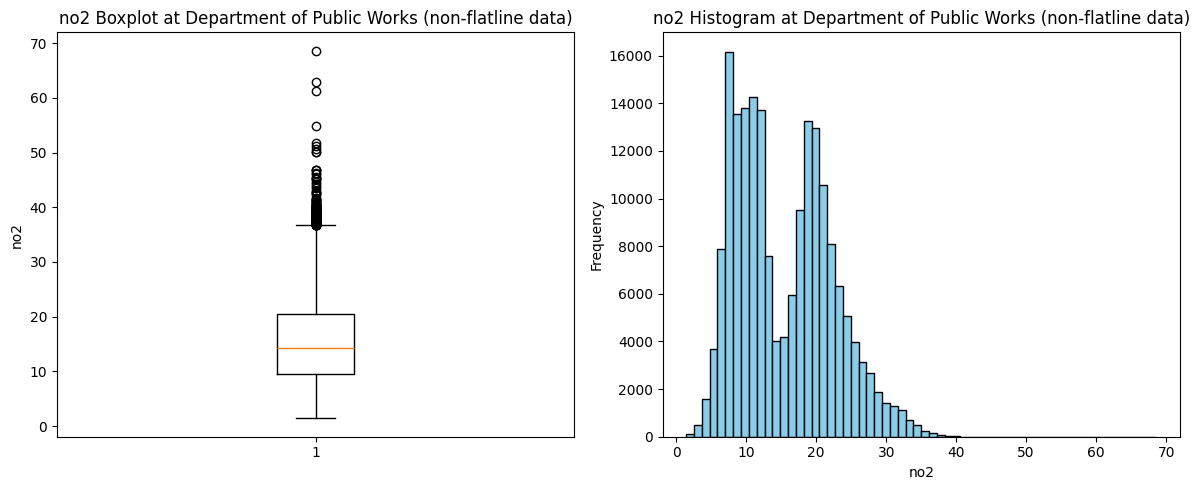

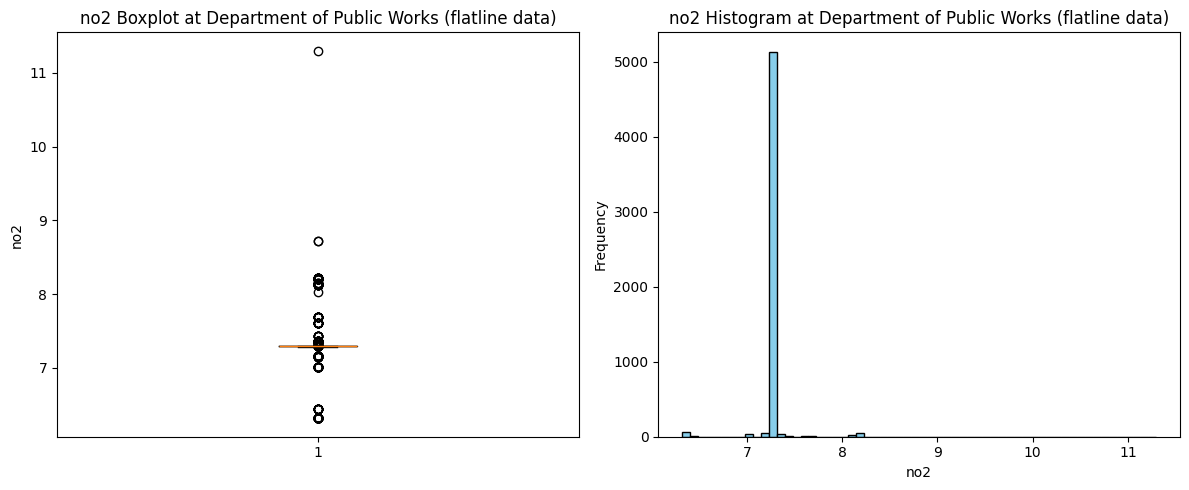

In [26]:
plot_box_and_histogram("no2", dpw_nonflat, "Department of Public Works (non-flatline data)")
plot_box_and_histogram("no2", dpw_flat, "Department of Public Works (flatline data)")

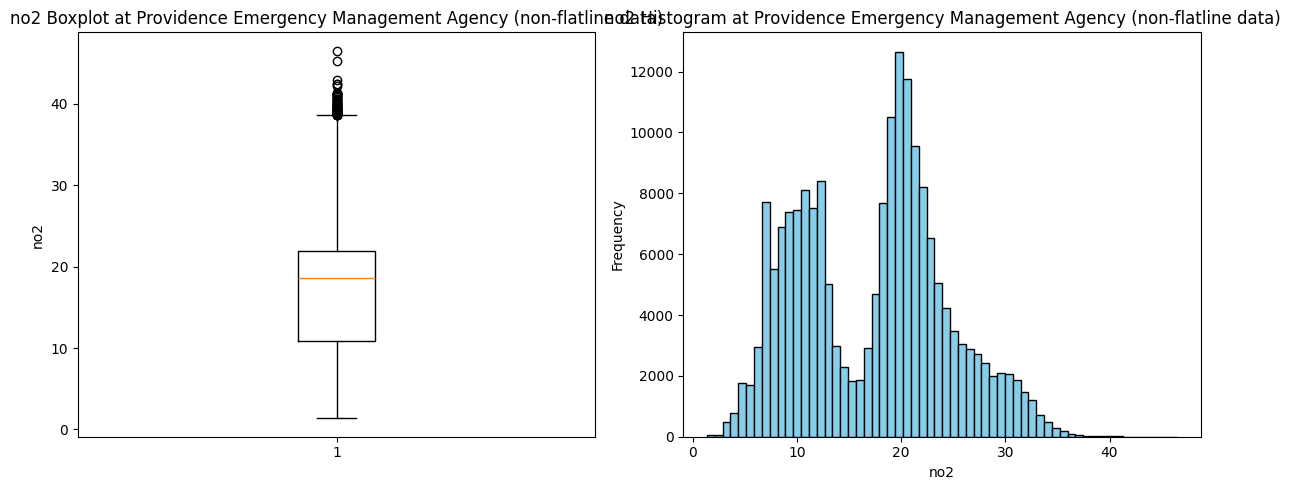

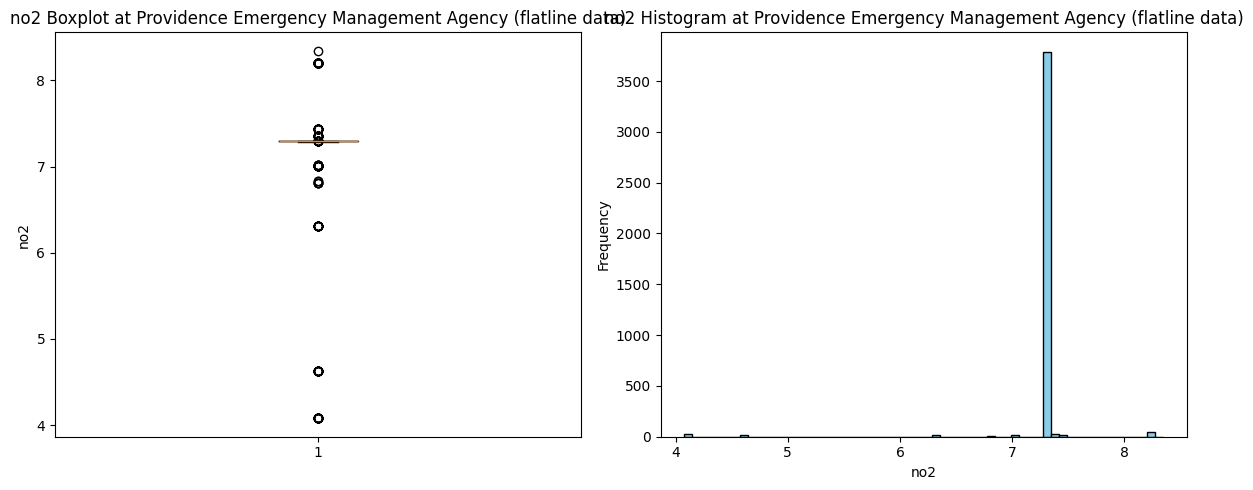

In [27]:
plot_box_and_histogram("no2", pema_nonflat, "Providence Emergency Management Agency (non-flatline data)")
plot_box_and_histogram("no2", pema_flat, "Providence Emergency Management Agency (flatline data)")

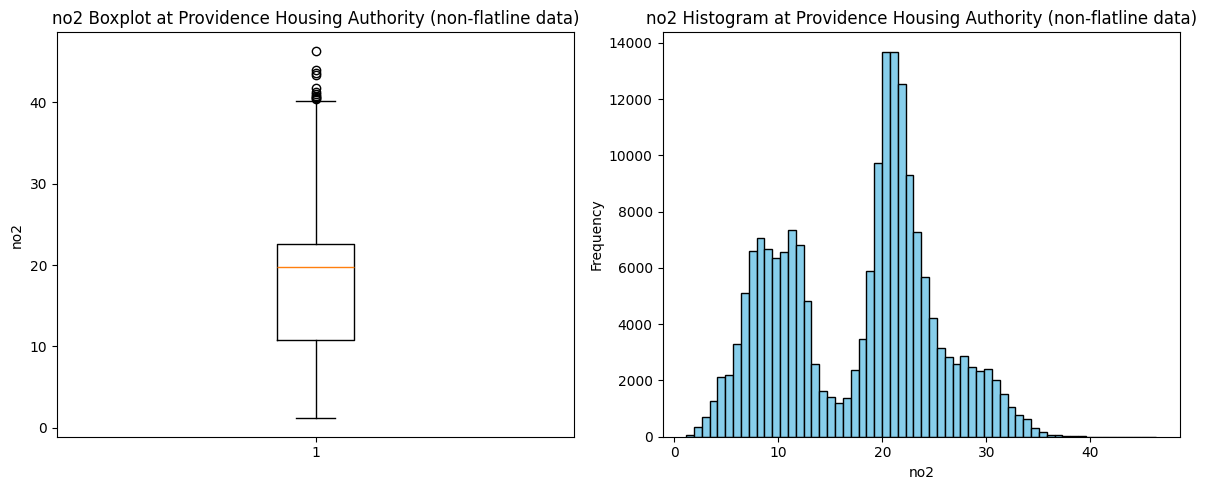

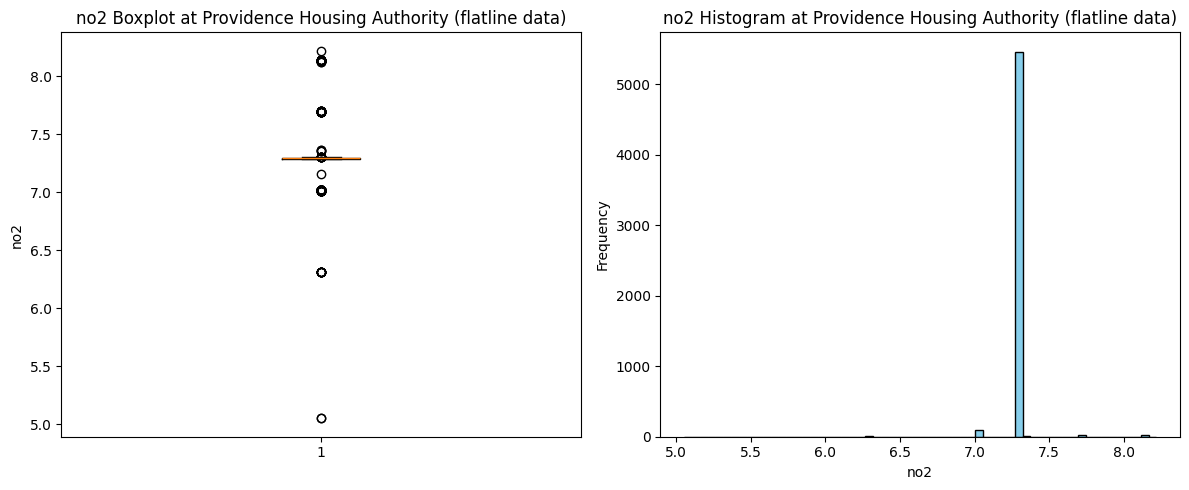

In [28]:
plot_box_and_histogram("no2", pha_nonflat, "Providence Housing Authority (non-flatline data)")
plot_box_and_histogram("no2", pha_flat, "Providence Housing Authority (flatline data)")